In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
%matplotlib inline 

In [2]:
churnData = pd.read_csv("file:///Users/DeLaLuna/Downloads/DATA_Customer-Churn.csv")


In [3]:
churnData.dtypes


gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
churnData['TotalCharges'] = pd.to_numeric(churnData['TotalCharges'],errors='coerce')



In [8]:
 churnData['TotalCharges'] = churnData['TotalCharges'].astype(np.float64)

In [10]:
 churnData['Churn'] = churnData['Churn'].astype(np.float64)

In [11]:
churnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7032 non-null   float64
 15  Churn             7043 non-null   float64
dtypes: float64(3), int64(2), object(11)
memory

In [5]:
 churnData

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,0
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,0
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,1
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,0
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,0
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,0
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,1


In [12]:
 churnData['TotalCharges'] =  churnData['TotalCharges'].fillna((churnData['TotalCharges'].mean()))

In [13]:
df = churnData[['TotalCharges', 'tenure', 'SeniorCitizen', 'MonthlyCharges']]

In [14]:
df

,TotalCharges,tenure,SeniorCitizen,MonthlyCharges
0,29.85,1,0,29.85
1,1889.50,34,0,56.95
2,108.15,2,0,53.85
3,1840.75,45,0,42.30
4,151.65,2,0,70.70
...,...,...,...,...
7038,1990.50,24,0,84.80
7039,7362.90,72,0,103.20
7040,346.45,11,0,29.60
7041,306.60,4,1,74.40


Split the data into a training set and a test set.

In [17]:
X= df
y= churnData['Churn']

In [4]:
churnData['Churn'] = np.where(churnData['Churn'] == "No", 0, np.where(churnData['Churn'] == "Yes", 1, churnData['Churn']))



In [15]:
churnData['Churn'].value_counts()

0.0    5174
1.0    1869
Name: Churn, dtype: int64

In [18]:
y

0       0.0
1       0.0
2       1.0
3       0.0
4       1.0
       ... 
7038    0.0
7039    0.0
7040    0.0
7041    1.0
7042    0.0
Name: Churn, Length: 7043, dtype: float64

In [19]:
X

,TotalCharges,tenure,SeniorCitizen,MonthlyCharges
0,29.85,1,0,29.85
1,1889.50,34,0,56.95
2,108.15,2,0,53.85
3,1840.75,45,0,42.30
4,151.65,2,0,70.70
...,...,...,...,...
7038,1990.50,24,0,84.80
7039,7362.90,72,0,103.20
7040,346.45,11,0,29.60
7041,306.60,4,1,74.40


In [20]:
y.value_counts(normalize=True)

0.0    0.73463
1.0    0.26537
Name: Churn, dtype: float64

In [22]:
X_train, X_test,y_train, y_test = train_test_split(X,y ,
                                   random_state=104, 
                                   test_size=0.25, 
                                   shuffle=True)

In [23]:
y_train

6586    0.0
2524    0.0
2776    1.0
3174    0.0
6700    0.0
       ... 
654     1.0
5371    1.0
729     0.0
5825    1.0
69      0.0
Name: Churn, Length: 5282, dtype: float64

In [28]:
from sklearn.preprocessing import PowerTransformer

In [29]:
pt = PowerTransformer(method='yeo-johnson')
pt.fit(X_train)
X_train_transformed = pt.transform(X_train)
X_test_transformed = pt.transform(X_test)

In [32]:
pt.fit(y_train.values.reshape(-1, 1))
y_train_transformed = pt.transform(y_train.values.reshape(-1, 1))
y_test_transformed = pt.transform(y_test.values.reshape(-1, 1))



In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix



log_model = LogisticRegression() 

## Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)


log_model.fit(X_train, y_train)

y_pred_train_log = log_model.predict(X_train)
y_pred_test_log = log_model.predict(X_test)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

,Error_metric,Train,Test
0,Accuracy,0.789670,0.797019
1,Precision,0.648833,0.674242
2,Recall,0.447351,0.470899


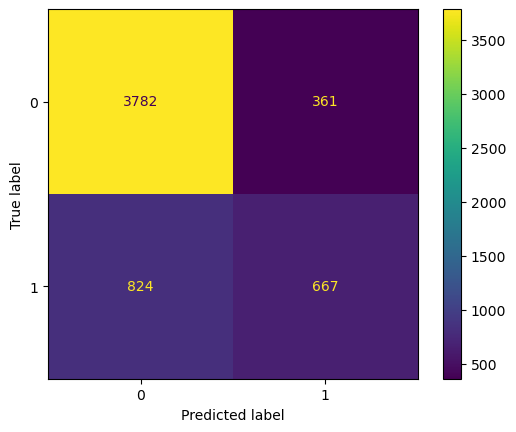

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_train = confusion_matrix(y_train, y_pred_train_log, labels =log_model.classes_ )
disp = ConfusionMatrixDisplay(cm_train)
disp.plot()

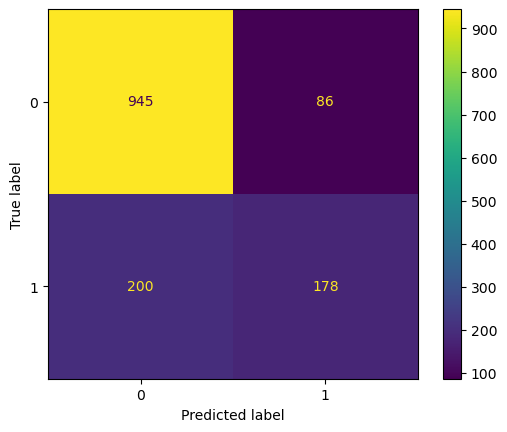

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_train = confusion_matrix(y_test, y_pred_test_log, labels =log_model.classes_ )
disp = ConfusionMatrixDisplay(cm_train)
disp.plot()


In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
model = KNeighborsClassifier(n_neighbors=5,weights='uniform') # declare we're using knn classification model
model.fit(X_train, y_train) # train model here we are loading the training data
y_pred = model.predict(X_test) # predict test. here we adjusting the model based on the tain data inputted 
y_pred_train=model.predict(X_train) # predict train (for sanity checks)
#model.predict_proba(inputdata)

In [39]:
def evaluate_classification_model(y_train, y_pred_train, y_test, y_pred_test):
    """
    Generates performance metrics and comparisons of labels with their predicted values
    :param y_train: training labels
    :param y_pred_train: predictions from the model on the training set
    :param y_test: test labels
    :param y_pred_test: predictions from the model on the test set
    :returns: 3 dfs - Accuracy, Precision, and Recall scores, y_train vs. y_pred_train and y_test vs. y_pred_dist
    """
    performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train),
                                         recall_score(y_train, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred_test),
                                        precision_score(y_test, y_pred_test),
                                        recall_score(y_test, y_pred_test)]})
    
    pd.options.display.float_format = '{:.2f}'.format

    df_train = pd.DataFrame({'Real': y_train, 'Predicted': y_pred_train})
    df_test  = pd.DataFrame({'Real': y_test,  'Predicted': y_pred_test})

    return performance_df, df_train, df_test


In [40]:
## calling the function
error_metrics_df,y_train_vs_predicted, y_test_vs_predicted =evaluate_classification_model(y_train, y_pred_train,y_test, y_pred)
error_metrics_df

,Error_metric,Train,Test
0,Accuracy,0.83,0.77
1,Precision,0.74,0.61
2,Recall,0.57,0.43


In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Initialize lists to store the evaluation metrics
k_values = []
accuracy_scores = []
precision_scores = []
recall_scores = []

# Iterate over different values of k
for k in range(1, 21):
    # Create and fit the KNN model
    model = KNeighborsClassifier(n_neighbors=k, weights='uniform')
    model.fit(X_train, y_train)
    
    # Predict the target variable for the test set
    y_pred = model.predict(X_test)
    
    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    # Append the results to the lists
    k_values.append(k)
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)

# Print the evaluation metrics for each value of k
for k, accuracy, precision, recall in zip(k_values, accuracy_scores, precision_scores, recall_scores):
    print(f"K = {k}: Accuracy = {accuracy:.4f}, Precision = {precision:.4f}, Recall = {recall:.4f}")


K = 1: Accuracy = 0.7140, Precision = 0.4658, Recall = 0.4497
K = 2: Accuracy = 0.7544, Precision = 0.6067, Recall = 0.2407
K = 3: Accuracy = 0.7388, Precision = 0.5170, Recall = 0.4021
K = 4: Accuracy = 0.7644, Precision = 0.6264, Recall = 0.3016
K = 5: Accuracy = 0.7715, Precision = 0.6053, Recall = 0.4259
K = 6: Accuracy = 0.7750, Precision = 0.6597, Recall = 0.3333
K = 7: Accuracy = 0.7764, Precision = 0.6286, Recall = 0.4074
K = 8: Accuracy = 0.7835, Precision = 0.6931, Recall = 0.3466
K = 9: Accuracy = 0.7835, Precision = 0.6567, Recall = 0.4048
K = 10: Accuracy = 0.7828, Precision = 0.6978, Recall = 0.3360
K = 11: Accuracy = 0.7814, Precision = 0.6549, Recall = 0.3915
K = 12: Accuracy = 0.7842, Precision = 0.6947, Recall = 0.3492
K = 13: Accuracy = 0.7842, Precision = 0.6729, Recall = 0.3810
K = 14: Accuracy = 0.7864, Precision = 0.7081, Recall = 0.3466
K = 15: Accuracy = 0.7871, Precision = 0.6822, Recall = 0.3862
K = 16: Accuracy = 0.7835, Precision = 0.6952, Recall = 0.3439
K